In [30]:
# Import required libraries

from datetime import datetime
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

In [31]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
df = pd.read_csv("/content/drive/MyDrive/EMSE 6577/Data/study-3/nyc-arrest-vaccine-data-2021.csv").drop(columns=["Unnamed: 0"])

In [33]:
display(df)

,income,pct_college,avg_commute_time,pop_pct_black,pct_fully_vacc_pre,pct_1plus_pre,pct_fully_vacc_post,pct_1plus_post,avg_percent_positivity,arrests_per_capita
0,0.509183,1.481763,-2.014210,-0.072904,0.855699,0.856195,0.258095,0.006063,-2.171844,-0.430626
1,0.167865,1.714032,-2.448167,-0.974082,1.218481,1.225356,0.586302,0.436014,-3.257545,0.755654
2,-0.891828,0.656598,-2.241319,-1.393006,1.081082,1.172701,1.149368,1.021064,0.240573,0.391421
3,-0.332910,0.596838,-1.365641,0.500095,-0.052780,-0.094543,-0.441100,-0.519272,0.020607,1.289050
4,-1.195086,0.366522,-1.720121,-0.785040,1.287998,1.457127,1.374411,1.448563,-0.965846,2.035885
5,-0.115993,1.165349,-1.388840,0.897976,0.665773,0.593756,0.321049,0.225735,1.173365,0.741019
6,-0.336969,0.527743,-0.674868,0.514261,-0.446512,-0.526894,-0.527607,-0.416855,0.143601,0.184041
7,0.800417,0.073694,0.104838,-1.252358,-0.127181,-0.038912,0.339193,0.338637,1.659270,0.408539
8,-1.150219,-0.489446,-0.782727,-0.821890,0.570672,0.667899,1.161430,1.383613,0.066424,1.233748
9,-1.213265,-1.198566,-0.256016,-1.402024,0.043164,0.237099,0.701075,0.889699,-0.030098,1.063614


In [34]:
display(df.drop(columns=["pct_fully_vacc_pre","pct_1plus_pre","pct_fully_vacc_post","pct_1plus_post"]))

,income,pct_college,avg_commute_time,pop_pct_black,avg_percent_positivity,arrests_per_capita
0,0.509183,1.481763,-2.014210,-0.072904,-2.171844,-0.430626
1,0.167865,1.714032,-2.448167,-0.974082,-3.257545,0.755654
2,-0.891828,0.656598,-2.241319,-1.393006,0.240573,0.391421
3,-0.332910,0.596838,-1.365641,0.500095,0.020607,1.289050
4,-1.195086,0.366522,-1.720121,-0.785040,-0.965846,2.035885
5,-0.115993,1.165349,-1.388840,0.897976,1.173365,0.741019
6,-0.336969,0.527743,-0.674868,0.514261,0.143601,0.184041
7,0.800417,0.073694,0.104838,-1.252358,1.659270,0.408539
8,-1.150219,-0.489446,-0.782727,-0.821890,0.066424,1.233748
9,-1.213265,-1.198566,-0.256016,-1.402024,-0.030098,1.063614


In [35]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df.drop(columns=["pct_fully_vacc_pre","pct_1plus_pre","pct_fully_vacc_post","pct_1plus_post"]))
chi_square_value, p_value

(143.22938086234737, 5.299016479491432e-23)

In [37]:
from factor_analyzer.factor_analyzer import calculate_kmo, FactorAnalyzer
kmo_all,kmo_model=calculate_kmo(df.drop(columns=["pct_fully_vacc_pre","pct_1plus_pre","pct_fully_vacc_post","pct_1plus_post"]))
kmo_model

0.6124262007136534

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

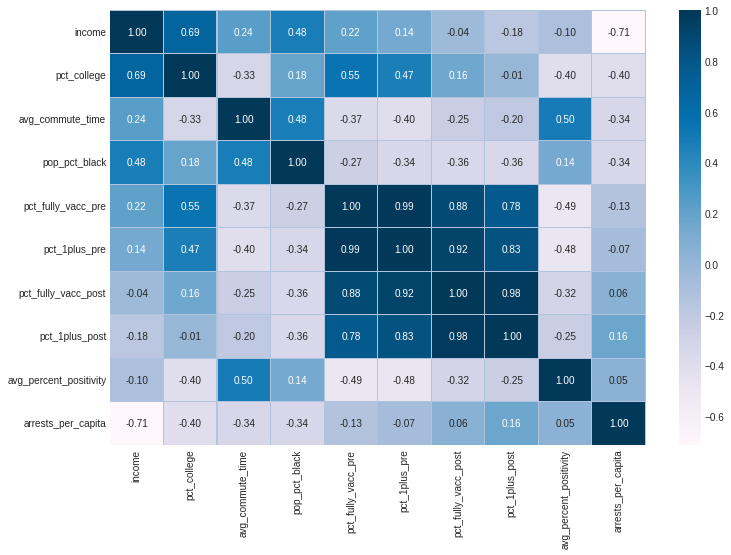

In [39]:
plt.figure(figsize=(12,8))
data = df.corr()
sns.heatmap(data,cmap='PuBu',fmt ='.2f',linewidths=0.1, linecolor='lightsteelblue',annot=True)

In [40]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df.drop(columns=["pct_fully_vacc_pre","pct_1plus_pre","pct_fully_vacc_post","pct_1plus_post"]))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()

ev

array([2.55423475, 1.92472465, 0.62288472, 0.53616383, 0.24038938,
       0.12160268])

In [41]:
ev

array([2.55423475, 1.92472465, 0.62288472, 0.53616383, 0.24038938,
       0.12160268])

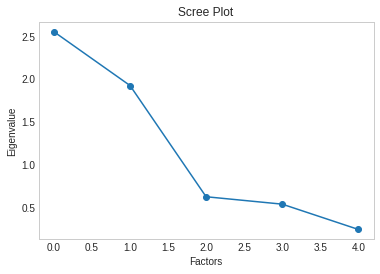

In [42]:
# Create scree plot using matplotlib
plt.scatter(range(0,5),ev[0:5])
plt.plot(range(0,5),ev[0:5])
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [43]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.set_params(n_factors=2, rotation='varimax')
fa.fit(df.drop(columns=["pct_fully_vacc_pre","pct_1plus_pre","pct_fully_vacc_post","pct_1plus_post"]))
loadings = fa.loadings_

In [44]:
df_load = pd.DataFrame(loadings)
df_load.index = df.drop(columns=["pct_fully_vacc_pre","pct_1plus_pre","pct_fully_vacc_post","pct_1plus_post"]).columns

#Keep income,pop_pct_black,arrests_per_capita as factor 0
df_load.sort_values(by=0)

,0,1
arrests_per_capita,-0.712378,-0.048049
avg_percent_positivity,-0.060816,0.569765
avg_commute_time,0.382214,0.924027
pop_pct_black,0.522539,0.285743
pct_college,0.629891,-0.615278
income,0.984451,-0.122996


In [45]:
#Keep avg_commute_time,pct_college as factor 1
df_load.sort_values(by=1)

,0,1
pct_college,0.629891,-0.615278
income,0.984451,-0.122996
arrests_per_capita,-0.712378,-0.048049
pop_pct_black,0.522539,0.285743
avg_percent_positivity,-0.060816,0.569765
avg_commute_time,0.382214,0.924027


In [ ]:
#df = df.drop(['pct_college','income','pop_pct_black','avg_percent_positivity','avg_commute_time'],axis=1)

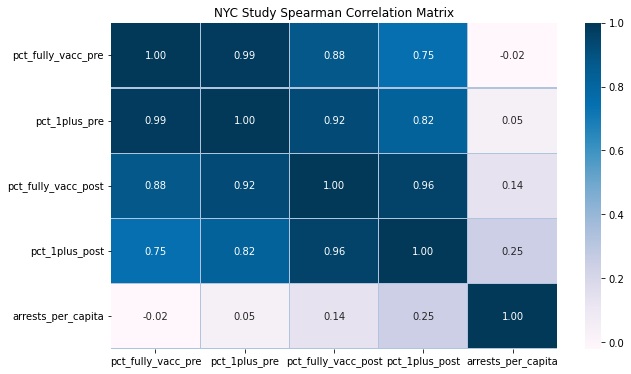

In [ ]:
plt.figure(figsize=(10,6))
plt.title("NYC Study Spearman Correlation Matrix")
data = df.corr(method='spearman')
sns.heatmap(data,cmap='PuBu',fmt ='.2f',linewidths=0.1, linecolor='lightsteelblue',annot=True)

In [ ]:
#Test for normality: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
from scipy import stats

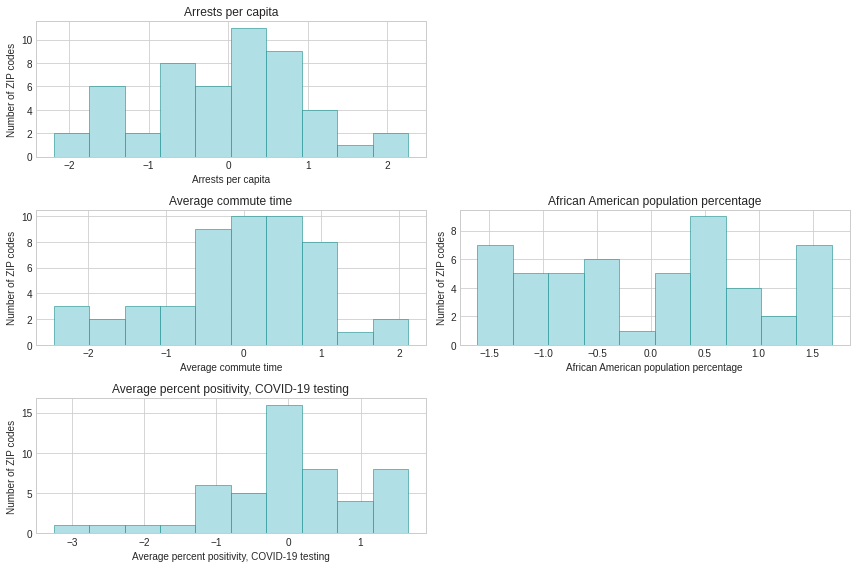

In [46]:
####plot of independent variables study for study 3 :pilot data
#Establish temporal precedence

plt.figure(figsize=(12,8))
plt.style.use('seaborn-whitegrid')

plt.subplot(3,2,1)
plt.hist(df["arrests_per_capita"],color = "powderblue",edgecolor='teal',linewidth=0.5)
plt.title('Arrests per capita')
plt.ylabel('Number of ZIP codes')
plt.xlabel("Arrests per capita")
plt.grid(visible=True, which='both')

plt.subplot(3,2,3)
plt.hist(df["avg_commute_time"],color = "powderblue",edgecolor='teal',linewidth=0.5)
plt.title('Average commute time')
plt.ylabel('Number of ZIP codes')
plt.xlabel("Average commute time")
plt.grid(visible=True, which='both')

plt.subplot(3,2,4)
plt.hist(df["pop_pct_black"],color = "powderblue",edgecolor='teal',linewidth=0.5)
plt.title('African American population percentage')
plt.ylabel('Number of ZIP codes')
plt.xlabel("African American population percentage")
plt.grid(visible=True, which='both')

plt.subplot(3,2,5)
plt.hist(df["avg_percent_positivity"],color = "powderblue",edgecolor='teal',linewidth=0.5)
plt.title('Average percent positivity, COVID-19 testing')
plt.ylabel('Number of ZIP codes')
plt.xlabel("Average percent positivity, COVID-19 testing")
plt.grid(visible=True, which='both')

plt.tight_layout()
plt.show()

In [ ]:
####plot of independent variables study for study 3 : arrests_per_capita
#Establish temporal precedence

plt.figure(figsize=(6,4))


plt.style.use('seaborn-whitegrid')
plt.hist(df["arrests_per_capita"],color = "powderblue",edgecolor='teal',linewidth=0.5)
plt.title('Arrests per capita')
plt.ylabel('Number of ZIP codes')
plt.xlabel("Arrests per capita")
plt.grid(visible=True, which='both')

plt.tight_layout()
plt.show()

# print(df["income"].mean())
# print(df["income"].median())
# print(df["income"].std())

# _, p = stats.normaltest(df["income"])
# alpha = 1e-3
# print("p = {:g}".format(p))

# if p < alpha:  # null hypothesis: x comes from a normal distribution
#     print("Cannot assume normality.")
# else:
#     print("Can assume normality.")

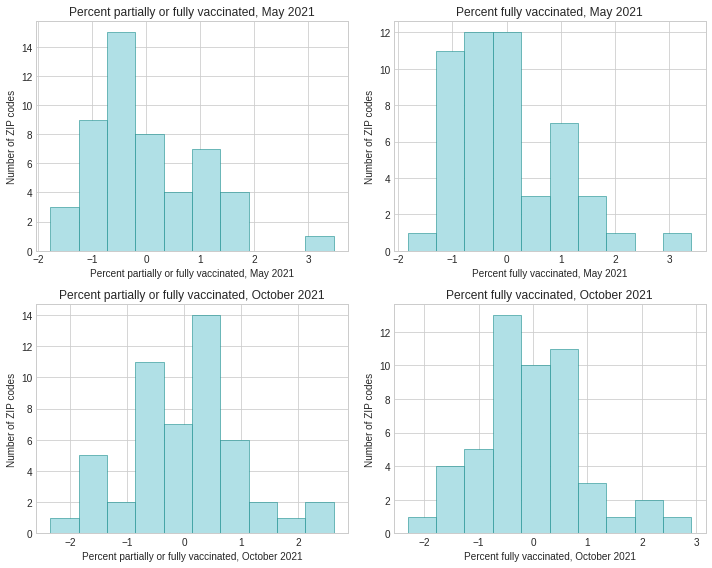

In [ ]:
####plot of dependent variables study for study 3 : arrests_per_capita
#Establish temporal precedence

plt.figure(figsize=(10,8))
plt.style.use('seaborn-whitegrid')


plt.subplot(2,2,1)
plt.hist(df["pct_1plus_pre"],color = "powderblue",edgecolor='teal',linewidth=0.5)
plt.title('Percent partially or fully vaccinated, May 2021')
plt.ylabel('Number of ZIP codes')
plt.xlabel("Percent partially or fully vaccinated, May 2021")
plt.grid(visible=True, which='both')

plt.subplot(2,2,2)
plt.hist(df["pct_fully_vacc_pre"],color = "powderblue",edgecolor='teal',linewidth=0.5)
plt.title('Percent fully vaccinated, May 2021')
plt.ylabel('Number of ZIP codes')
plt.xlabel("Percent fully vaccinated, May 2021")
plt.grid(visible=True, which='both')

plt.subplot(2,2,3)
plt.hist(df["pct_1plus_post"],color = "powderblue",edgecolor='teal',linewidth=0.5)
plt.title('Percent partially or fully vaccinated, October 2021')
plt.ylabel('Number of ZIP codes')
plt.xlabel("Percent partially or fully vaccinated, October 2021")
plt.grid(visible=True, which='both')


plt.subplot(2,2,4)
plt.hist(df["pct_fully_vacc_post"],color = "powderblue",edgecolor='teal',linewidth=0.5)
plt.title('Percent fully vaccinated, October 2021')
plt.ylabel('Number of ZIP codes')
plt.xlabel("Percent fully vaccinated, October 2021")
plt.grid(visible=True, which='both')


plt.tight_layout()
plt.show()


In [ ]:
###not an important variable as per factor analysis

#plt.figure(figsize=(16,8))

# plt.subplot(2,2,1)
# plt.hist(df["pct_college"],color = "skyblue")
# plt.title('Percent with a college degree')
# plt.ylabel('Number of ZIP codes')
# plt.xlabel("Percent with a college degree")
# plt.grid(visible=True, which='both')

# plt.tight_layout()
# plt.show()

# print(df["pct_college"].mean())
# print(df["pct_college"].median())
# print(df["pct_college"].std())

# _, p = stats.normaltest(df["pct_college"])
# alpha = 1e-3
# print("p = {:g}".format(p))

# if p < alpha:  # null hypothesis: x comes from a normal distribution
#     print("Cannot assume normality.")
# else:
#     print("Can assume normality.")

In [ ]:
####not an important variable as per factor analysis

# plt.figure(figsize=(16,8))

# plt.subplot(2,2,1)
# plt.hist(df["avg_commute_time"],color = "skyblue")
# plt.title('Average commute time')
# plt.ylabel('Number of ZIP codes')
# plt.xlabel("Average commute time")
# plt.grid(visible=True, which='both')

# plt.tight_layout()
# plt.show()

# print(df["avg_commute_time"].mean())
# print(df["avg_commute_time"].median())
# print(df["avg_commute_time"].std())

# _, p = stats.normaltest(df["avg_commute_time"])
# alpha = 1e-3
# print("p = {:g}".format(p))

# if p < alpha:  # null hypothesis: x comes from a normal distribution
#     print("Cannot assume normality.")
# else:
#     print("Can assume normality.")

In [ ]:
####not an important variable as per factor analysis


# plt.figure(figsize=(16,8))

# plt.subplot(2,2,1)
# plt.hist(df["pop_pct_black"],color = "skyblue")
# plt.title('Black population percentage')
# plt.ylabel('Number of ZIP codes')
# plt.xlabel("Black population percentage")
# plt.grid(visible=True, which='both')

# plt.tight_layout()
# plt.show()

# print(df["pop_pct_black"].mean())
# print(df["pop_pct_black"].median())
# print(df["pop_pct_black"].std())

# _, p = stats.normaltest(df["pop_pct_black"])
# alpha = 1e-3
# print("p = {:g}".format(p))

# if p < alpha:  # null hypothesis: x comes from a normal distribution
#     print("Cannot assume normality.")
# else:
#     print("Can assume normality.") 

In [ ]:
####not an important variable as per factor analysis


# plt.figure(figsize=(16,8))

# plt.subplot(2,2,1)
# plt.hist(df["avg_percent_positivity"],color = "skyblue")
# plt.title('Average percent positivity, COVID-19 testing')
# plt.ylabel('Number of ZIP codes')
# plt.xlabel("Average percent positivity, COVID-19 testing")
# plt.grid(visible=True, which='both')

# plt.tight_layout()
# plt.show()

# print(df["avg_percent_positivity"].mean())
# print(df["avg_percent_positivity"].median())
# print(df["avg_percent_positivity"].std())

# _, p = stats.normaltest(df["avg_percent_positivity"])
# alpha = 1e-3
# print("p = {:g}".format(p))

# if p < alpha:  # null hypothesis: x comes from a normal distribution
#     print("Cannot assume normality.")
# else:
#     print("Can assume normality.") 

In [ ]:
##Descriptive statistics of dependent variable : arrests_per_capita


print(df["arrests_per_capita"].mean())
print(df["arrests_per_capita"].median())
print(df["arrests_per_capita"].std())

_, p = stats.normaltest(df["arrests_per_capita"])
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("Cannot assume normality.")
else:
    print("Can assume normality.") 

In [ ]:
##Descriptive statistics of independent variable : pct_1plus_pre



print(df["pct_1plus_pre"].mean())
print(df["pct_1plus_pre"].median())
print(df["pct_1plus_pre"].std())

_, p = stats.normaltest(df["pct_1plus_pre"])
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("Cannot assume normality.")
else:
    print("Can assume normality.")

In [ ]:
##Descriptive statistics of independent variable : pct_fully_vacc_pre


print(df["pct_fully_vacc_pre"].mean())
print(df["pct_fully_vacc_pre"].median())
print(df["pct_fully_vacc_pre"].std())

_, p = stats.normaltest(df["pct_fully_vacc_pre"])
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("Cannot assume normality.")
else:
    print("Can assume normality.") 

In [ ]:
##Descriptive statistics of independent variable : pct_1plus_post

print(df["pct_1plus_post"].mean())
print(df["pct_1plus_post"].median())
print(df["pct_1plus_post"].std())

_, p = stats.normaltest(df["pct_1plus_post"])
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("Cannot assume normality.")
else:
    print("Can assume normality.")

In [28]:
##Descriptive statistics of independent variable : pct_fully_vacc_post


print(df["pct_fully_vacc_post"].mean())
print(df["pct_fully_vacc_post"].median())
print(df["pct_fully_vacc_post"].std())

_, p = stats.normaltest(df["pct_fully_vacc_post"])
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("Cannot assume normality.")
else:
    print("Can assume normality.") 

2.2901071017758132e-15
0.0869490058181895
1.0099504938362078
p = 0.215754
Can assume normality.


In [ ]:
law_mean = df["arrests_per_capita"].mean()
law_median = df["arrests_per_capita"].median()
print(law_mean)
print(law_median)

In [ ]:
def assign_group(row):
  if row["arrests_per_capita"] > law_median :
    return 1
  return 0

In [ ]:
df["group"] = df.apply(lambda row: assign_group(row), axis=1)

In [ ]:
df["group"].value_counts()

In [ ]:
!pip install pingouin

In [ ]:
import statsmodels.formula.api as smf 
from statsmodels.stats.anova import anova_lm

In [ ]:
from pingouin import ancova, kruskal

In [ ]:
df['pct_fully_vacc_post'] = df['pct_fully_vacc_post']/100 #(df['pct_fully_vacc_post'] - df["pct_fully_vacc_post"].min())/df['pct_fully_vacc_post'].max() - df["pct_fully_vacc_post"].min()
df['pct_fully_vacc_pre'] = df['pct_fully_vacc_pre']/100 #(df['pct_fully_vacc_pre'] - df['pct_fully_vacc_pre'].min())/(df['pct_fully_vacc_pre'].max() - df['pct_fully_vacc_pre'].min())
df['pct_1plus_post'] = df['pct_1plus_post']/100 #(df['pct_1plus_post'] - df['pct_1plus_post'].min())/((df['pct_1plus_post'].max() - df['pct_1plus_post'].min()))
df['pct_1plus_pre'] = df['pct_1plus_pre']/100 #(df['pct_1plus_pre'] - df['pct_1plus_pre'].min())/((df['pct_1plus_pre'].max() - df['pct_1plus_pre'].min()))
df["fully_vaccinated_diff"] = df['pct_fully_vacc_post'] - df['pct_fully_vacc_pre']
df["1plus_diff"] = df['pct_1plus_post'] - df['pct_1plus_pre']

In [ ]:
arrests_mean = df['arrests_per_capita'].mean()

def assign_group(row):
  if row['arrests_per_capita'] > arrests_mean:
    return 1
  return 0

df["group"] = df.apply (lambda row: assign_group(row), axis=1)

print(df["group"].value_counts())

X= df[["group","avg_commute_time","pct_college","income","pop_pct_black","pct_fully_vacc_pre"]]
lm = smf.ols(formula="pct_fully_vacc_post ~ group + avg_commute_time + pct_college + income + pop_pct_black + pct_fully_vacc_pre", data = df).fit()
print(lm.summary())
table = anova_lm(lm, typ=1) # Type 2 Anova DataFrame
print(table)

In [ ]:
0.000037/0.000328

In [ ]:
arrests_mean = df['arrests_per_capita'].mean()

def assign_group(row):
  if row['arrests_per_capita'] > arrests_mean:
    return 1
  return 0

df["group"] = df.apply (lambda row: assign_group(row), axis=1)

print(df["group"].value_counts())
X= df[["group","avg_commute_time","pct_college","income","pop_pct_black","pct_fully_vacc_pre"]]
lm = smf.ols(formula="pct_1plus_post ~ group + avg_commute_time + pct_college + income + pop_pct_black + pct_1plus_pre", data = df).fit()
print(lm.summary())
table = anova_lm(lm, typ=1) # Type 2 Anova DataFrame
print(table)

In [ ]:
0.000135/0.000390

####Not working from here onwards


In [ ]:
# arrests_mean = df['arrests_per_capita'].mean()

# def assign_group(row):
#   if row['arrests_per_capita'] > arrests_mean:
#     return 1
#   return 0

# df["group"] = df.apply (lambda row: assign_group(row), axis=1)

# print(df["group"].value_counts())
# print("Ancova - pct_1plus_post:")
# #print(ancova(data=df, dv='pct_1plus_post', covar=["avg_commute_time","pct_college","income","pop_pct_black",'pct_1plus_pre'], between='group'))
# print(ancova(data=df, dv='pct_1plus_post', covar=["'pct_1plus_pre'], between='group'))
# print(df.groupby('group')[['pct_fully_vacc_post','pct_1plus_post','fully_vaccinated_diff','1plus_diff']].mean())
# diffmean_o1 = 0.633982  -  0.606959
# print(diffmean_o1)

In [ ]:
# arrests_mean = df['arrests_per_capita'].mean()

# def assign_group(row):
#   if row['arrests_per_capita'] > arrests_mean:
#     return 1
#   return 0

# df["group"] = df.apply (lambda row: assign_group(row), axis=1)

# print(df["group"].value_counts())
# print("Ancova - fully_vaccinated_diff:")
# print(ancova(data=df, dv='fully_vaccinated_diff', covar=["avg_commute_time","pct_college","income","pop_pct_black"], between='group'))
# print(df.groupby('group')[['pct_fully_vacc_post','pct_1plus_post','fully_vaccinated_diff','1plus_diff']].mean())
# diffmean_o1 =  0.229150  -  0.208107 
# print(diffmean_o1)

In [ ]:
# arrests_mean = df['arrests_per_capita'].mean()

# def assign_group(row):
#   if row['arrests_per_capita'] > arrests_mean:
#     return 1
#   return 0

# df["group"] = df.apply (lambda row: assign_group(row), axis=1)

# print(df["group"].value_counts())
# print("Ancova - 1plus_diff:")
# print(ancova(data=df, dv='1plus_diff', covar=["avg_commute_time","pct_college","income","pop_pct_black"], between='group'))
# print(df.groupby('group')[['pct_fully_vacc_post','pct_1plus_post','fully_vaccinated_diff','1plus_diff']].mean())
# diffmean_o1 =  0.241559  -  0.215566 
# print(diffmean_o1)

In [ ]:
#plt.scatter(df['pct_1plus_pre'],df['pct_1plus_post'])

In [ ]:
#plt.scatter(df['pct_fully_vacc_pre'],df['pct_fully_vacc_post'])